<a href="https://colab.research.google.com/github/sasuraibito1125/google_colab/blob/main/%E3%82%B0%E3%83%A9%E3%83%95%E3%83%86%E3%83%B3%E3%83%97%E3%83%AC%E3%83%BC%E3%83%88%EF%BC%9A%E3%83%87%E3%83%BC%E3%82%BF%E3%81%AE%E3%82%B0%E3%83%A9%E3%83%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 手順

1. 「グラフテンプレート：○○○」セル配下をページの先頭にコピペして実行する
2. 「テンプレート」セル配下の各テキストセルの内容をコードセルにコピペして利用する内容に合わせて実装を修正する
  * 「テンプレート」の代わりに対応する「使用例」でも可
3. 「日本語対応」、「関数定義」、2で修正したセルの順に実行する

# グラフテンプレート：データのグラフ

## 日本語対応

In [ ]:
#@title ##### 日本語対応 { vertical-output: true, display-mode: "form" }
# 日本語化モジュールインストール
!pip install -qq japanize-matplotlib

# 日本語化モジュールインポート
import japanize_matplotlib

## 関数定義

### 算数値算出関数

In [ ]:
#@title ##### 関数定義：関数の値の計算 { vertical-output: true, display-mode: "form" }
#@markdown 関数名：`calc_values`
#@markdown * 引数：`f`, `N`, `xmin`, `xmax`, `multiple=False`
#@markdown * 戻り値：`tuple<ndarray, ndarray>`
def calc_values(f, N, xmin, xmax, multiple=False):
  """関数の値の計算

    指定された関数の値を算出する

    Args:
        f (function): 関数定義（必須）
        N (int): 定義域の分割数（プロット数）（必須）
        xmin (number): 定義域の最小値（必須）
        xmax (number): 定義域の最大値（必須）
        multiple (bool): 関数の引数がコレクションか否か

    Returns:
        Xの値、Yの値
  """
  import numpy as np

  # 定義域
  d = np.linspace(xmin, xmax, N)
  # 値域
  r = f(d) if multiple else [f(d[i]) for i in range(N)]

  return d, r

In [ ]:
#@title ##### 関数定義：離散用の関数値算出関数
#@markdown 関数名：`calc_values_discrete`
#@markdown * 引数：`f`, `N`, `xmin`, `xmax`, `multiple=False`
#@markdown * 戻り値：`tuple<ndarray, ndarray>`
def calc_values_discrete(f, N, xmin, xmax, multiple=False):
  """関数の値の計算（離散用）

    指定された関数の値を算出する

    Args:
        f (function): 関数定義
        N (int): 定義域の分割数（プロット数）
        xmin (number): 定義域の最小値
        xmax (number): 定義域の最大値
        multiple (bool): 関数の引数がコレクションか否か

    Returns:
        Xの値、Yの値
  """
  import numpy as np

  # 定義域
  d = np.arange(xmin, xmax, N)
  # 値域
  r = f(d) if multiple else [f(d[i]) for i in range(N)]
  return d, r


### 描画関数

In [ ]:
#@title ##### 関数定義：ヒストグラム描画関数 { vertical-output: true, display-mode: "form" }
#@markdown 変数名：`draw_bar`
#@markdown * 引数：`plt`, `d`, `r`, `label`
#@markdown * 戻り値：`BarContainer`
draw_bar = lambda plt, d, r, label: plt.bar(d, r, label=label)

In [ ]:
#@title ##### 関数定義：散布図描画関数 { vertical-output: true, display-mode: "form" }
#@markdown 変数名：`draw_scatter`
#@markdown * 引数：`plt`, `d`, `r`, `label`
#@markdown * 戻り値：`PathCollection`
draw_scatter = lambda plt, d, r, label: plt.scatter(d, r, label=label)

### グラフ作成

In [ ]:
#@title ##### 関数定義：グラフ描画関数 { vertical-output: true, display-mode: "form" }
#@markdown 関数名：`draw_graph`
#@markdown * 引数：`d`, `r`, `view_range=None`, `title=None`, `label=None`, `square=False`, `draw_func=lambda plt, d, r, label: plt.plot(d, r, linestyle='-', label=label) if label else plt.plot(d, r, linestyle='-')`
def draw_graph(d, r, view_range=None, title=None, label=None, square=False,
               draw_func=lambda plt, d, r, label: plt.plot(d, r, linestyle='-', label=label) if label
               else plt.plot(d, r, linestyle='-')):
  """グラフ描画関数

    指定されたデータに対するグラフを描画する

    Args:
        d (list): 定義域のデータ値（必須）
        r (list): 値域のデータ値（必須）
        view_range (list): 表示する値域の最小値, 表示する値域の最大値,
                           表示する定義域の最小値, 表示する定義域の最大値
        title (str): グラフのタイトル
        label (str): グラフのラベル
        square (boolean): アスペクトを等しくするか（TODO パラメタ位置変更）
        draw_func (function): 描画関数（デフォルトはplot）

    Returns:
        None
  """
  import matplotlib.pyplot as plt
  import math

  # アスペクトをそろえる
  if square:
    plt.axes().set_aspect('equal')

  # 横軸(horizon)ゼロの太線化
  plt.axhline(0, linewidth=1, color='grey')

  # 縦軸(Vertical)ゼロの太線化
  plt.axvline(0, linewidth=1, color='grey')

  # 表示範囲の設定
  if view_range:
    plt.axis(view_range)
  else:
    plt.axis([math.min(r), math.max(r), math.min(d), math.max(d)])

  # グラフのタイトルの設定
  if title:
    plt.title(title)

  # 描画
  if not draw_func:
    draw_func =lambda plt, d, r, label: plt.plot(d, r, linestyle='-', label=label) if label \
      else plt.plot(d, r, linestyle='-')
  draw_func(plt, d, r, label)
  if label:
    plt.legend()
  plt.show()

## テンプレート

```python
# グラフパラメタ
params = {
  # グラフの範囲
  'view_range': [表示する定義域の最小値, 表示する定義域の最大値, 表示する値域の最小値, 表示する値域の最大値],

  # グラフのタイトルとラベル
  'title': 'グラフのタイトル',
  'label': 'グラフのラベル'
}
```

```python
# 実行
draw_graph(xdata, ydata, **params)
````

# 使用例

※ここで実行する場合は各使用例に対して以下の手順で行う
1. 使用例に対応する上記テンプレートモジュールの「日本語対応」セルを実行する
2. 使用例に対応する上記テンプレートモジュールの「関数定義」セルを実行する
3. 使用例に対応する下記の例のセルを実行する

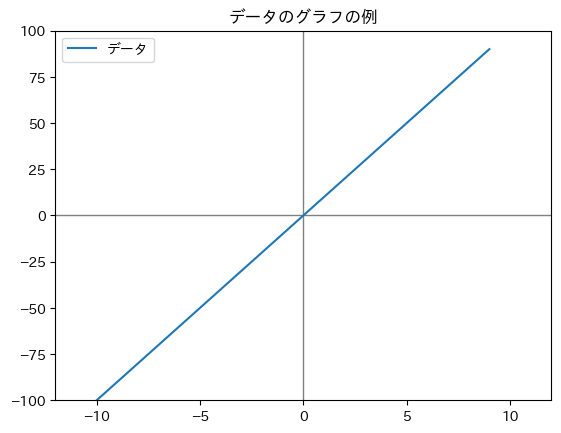

In [ ]:
#@title ##### データのグラフの例 { vertical-output: true, display-mode: "both" }
# グラフパラメタ
params = {
  # グラフの範囲
  'view_range': [-12, 12, -100, 100],

  # グラフのタイトルとラベル
  'title': 'データのグラフの例',
  'label': 'データ'
}

# 実行
draw_graph(np.arange(-10, 10, 1), np.arange(-100, 100, 10), **params)